# Importing the data and declaring package dependencies.

In [2]:
#Neccessary Libraries
import pandas as pd
from pandas import *
from plotnine import *

In [4]:
#Importing and assinging avocado variable to data set 1
avocado = pd.read_csv("avocado-updated-2020.csv")

# Describing The Data

## Variable Descripitons
- Date - The date of the observation, later separated to also be separate columns 'day', 'month', 'year'
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- geography - the region of the observation, later separated into 5  columns,'city', 'metropolitan', 'state', 'region', 'country'
- Total Volume - Total number of avocados sold, later changed to 'sales'
- total_bags - total number of avocado bags sold
- 4046 - Total number of avocados with PLU 4046 sold, later switched to 'small_hass sales'
- 4225 - Total number of avocados with PLU 4225 sold, later switched to 'large_hass sales'
- 4770 - Total number of avocados with PLU 4770 sold, later switched to 'xlarge_hass sales'
- total_bags- total avocado bags sold
- small_bags- total small avocado bags sold
- large_bags- total large avocado bags sold
- xlarge_bags- total xlarge avocado bags sold


In [5]:
#preliminary descripiton of our variables
avocado.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


# DATA CLEANING

## Splitting Date Column into Day, Month, Year

In [6]:
#Splitting the date column into three columns by the "-" delimiter
avocado[['year', 'month', 'day']] = avocado['date'].str.split('-', expand=True)

#Converting new variables into floats
avocado['year'] = avocado['year'].astype(str)
avocado['month'] = avocado['month'].astype(str)
avocado['day'] = avocado['day'].astype(str)
avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,01,04
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,01,04
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,01,04
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,01,04
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,01,04


## Renaming columns

In [7]:
new_column_names = {'total_volume': 'sales_volume', '4046': 'small_hass_sales','4225': 'large_hass_sales','4770': 'xlarge_hass_sales', }

# Use the .rename() method to change column names
avocado.rename(columns=new_column_names, inplace=True)

## Cleaning Geography Column

In [8]:
#showing unique values in the geography column to be able to extract them into their own columns
unique_geography_values = avocado['geography'].unique()
print(unique_geography_values)

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [9]:
#Creating a mapping dictionary for each of the unique regions represented in 'geography'

#City mapping dictionary
city = { "Albany":"Albany", "Atlanta":"Atlanta", "Boise":"Boise", "Boston":"Boston", "Charlotte":"Charlotte", "Chicago":"Chicago", "Columbus":"Columbus",
        "Denver":"Denver", "Detroit":"Detroit", "Grand Rapids":"Grand Rapids", "Houston":"Houston", "Indianapolis":"Indianapolis", "Jacksonville":"Jacksonville",
         "Las Vegas":"Las Vegas", "Los Angeles":"Los Angeles", "Louisville":"Louisville", "Nashville":"Nashville", "New York":"New York", "Orlando":"Orlando",
         "Philadelphia":"Philadelphia", "Pittsburgh":"Pittsburgh", "Portland":"Portland", "Roanoke":"Roanoke", "Sacramento":"Sacramento", "San Diego":"San Diego",
         "San Francisco":"San Francisco", "Seattle":"Seattle", "Spokane":"Spokane", "St. Louis":"St. Louis", "Syracuse":"Syracuse", "Tampa":"Tampa"}
#Metropolitan mapping dictionary
metro = { "Baltimore/Washington":"Baltimore/Washington", "Buffalo/Rochester":"Buffalo/Rochester", "Cincinnati/Dayton":"Cincinnati/Dayton",
         "Dallas/Ft. Worth":"Dallas/Ft. Worth", "Harrisburg/Scranton":"Harrisburg/Scranton", "Hartford/Springfield":"Hartford/Springfield",
          "Miami/Ft. Lauderdale":"Miami/Ft. Lauderdale", "New Orleans/Mobile":"New Orleans/Mobile", "Phoenix/Tucson":"Phoenix/Tucson",
          "Raleigh/Greensboro":"Raleigh/Greensboro", "Richmond/Norfolk":"Richmond/Norfolk", "West Tex/New Mexico":"West Tex/New Mexico"}
#Greater Region mapping dictionary
region = {"Great Lakes":"Great Lakes", "Midsouth":"Midsouth", "Northeast":"Northeast", "Northern New England":"Northern New England",
          "South Central":"South Central", "Southeast":"Southeast", "West":"West", "Plains":"Plains",}
#State mapping dictionary (note, we assumed New York as just city)
state = {"California":"California", "South Carolina":"South Carolina"}
#Country mapping dictionary
country = {"Total U.S.":"Total U.S."}

#Creating new columns utilizing dictionaries to extract relevant instances of each variable category
avocado['city'] = avocado['geography'].map(city)

avocado['metro'] = avocado['geography'].map(metro)

avocado['region'] = avocado['geography'].map(region)

avocado['state'] = avocado['geography'].map(state)

avocado['country'] = avocado['geography'].map(country)

#checking
avocado.head()

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,01,04,NaN,Baltimore/Washington,NaN,NaN,NaN


In [10]:
#renaming dataframe to be the clean version
avocado_clean = avocado
avocado_clean

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,01,04,NaN,Baltimore/Washington,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,11,29,NaN,NaN,NaN,NaN,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,11,29,NaN,NaN,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,11,29,NaN,NaN,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,11,29,NaN,West Tex/New Mexico,NaN,NaN,NaN


# Exercises

## 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [11]:
#subsetting by year, 2017 and type, organic
organic_2017 = avocado_clean[(avocado_clean['year'] == '2017') & (avocado_clean['type'] == 'organic')]
#checking the subset
#organic_2017

#grouping by region, then taking the sum of small hass sales for the regions
reg_small = organic_2017.groupby('region')['small_hass_sales'].sum()

#finding the region with the highest sales by region for organic avocados in 2017
max_region = reg_small.idxmax()
print(max_region)
print(f"'{max_region}' was the major geographical region that sold the most total organic, small Hass avocados in 2017.")


West
'West' was the major geographical region that sold the most total organic, small Hass avocados in 2017.


## 4.In which month is the highest average volume of avocado sales?

In [12]:
#grouping by montha and taking the average sales for each month
average_volume_by_month = avocado_clean.groupby('month')['sales_volume'].mean()

#Finding the highest of those averages
highest_average_volume_month = average_volume_by_month.idxmax()

#Result
print(highest_average_volume_month)
print(f"The month with the highest average volume of avocado sales is May.")


05
The month with the highest average volume of avocado sales is May.


## 5.Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [13]:
#filtering by metropolitan areas and adding up the sales volume for each
metro_sales = avocado_clean.groupby('metro')['sales_volume'].sum()
#finding the max of the metropolitan sales
max_metro = metro_sales.idxmax()
#results
print(max_metro)
print(f"{max_metro} was the the metro area that sold the most total avocados.")

Dallas/Ft. Worth
Dallas/Ft. Worth was the the metro area that sold the most total avocados.


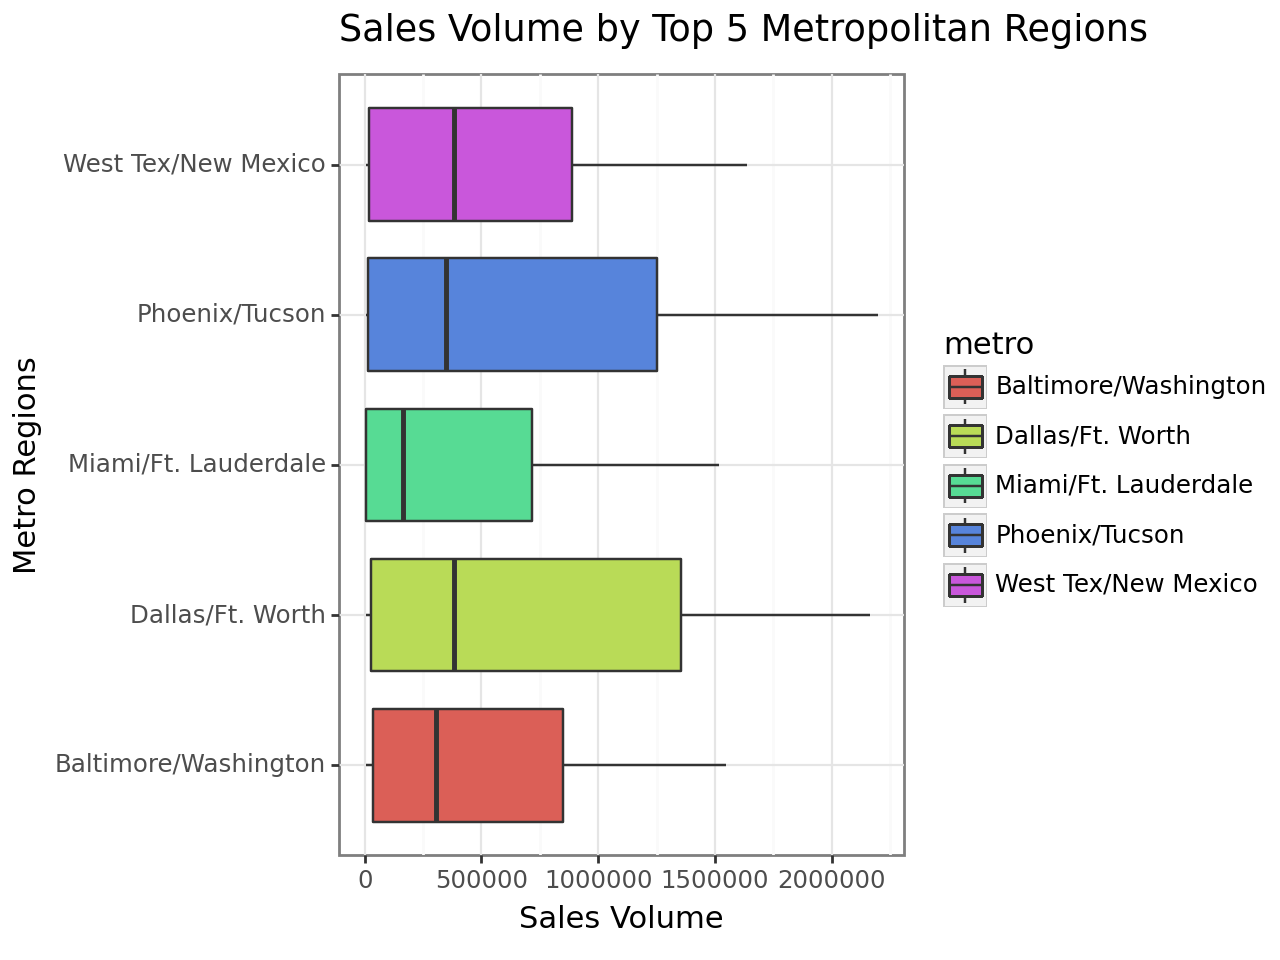

<Figure Size: (640 x 480)>

In [14]:
#Grouping by metro area and calculating the average sales for each
average_sales_by_region = avocado_clean.groupby('metro')['sales_volume'].mean().reset_index()

#Only seeing the top 5 regions with the highest average total sales volume
top_5 = average_sales_by_region.nlargest(5, 'sales_volume')['metro']

#subsetting to only include the regions found above
top_5_only = avocado_clean[avocado_clean['metro'].isin(top_5)]

#Visualization
ggplot(top_5_only, aes(x='metro', y='sales_volume', fill='metro'))\
+ geom_boxplot()\
+ labs(title='Sales Volume by Top 5 Metropolitan Regions', x='Metro Regions', y='Sales Volume')\
+ theme(axis_text_x=element_text(rotation=45, hjust=1))\
+ theme_bw()\
+ coord_flip()

# PIVOTING

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

## 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [15]:
california = avocado_clean[(avocado_clean['city'] == 'Los Angeles') | (avocado_clean['city'] == 'San Diego') | (avocado_clean['city'] == 'Sacramento') | (avocado_clean['city'] == 'San Francisco')]
california

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,01,04,San Diego,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,11,29,Sacramento,NaN,NaN,NaN,NaN
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,11,29,San Francisco,NaN,NaN,NaN,NaN


- In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [16]:
#pivothing the data, we want conventional and organic average prices by their city from california subset
wide_california = california.pivot_table(index = "city", columns = "type", values = "average_price").reset_index()
wide_california

type,city,conventional,organic
0,Los Angeles,1.047124,1.574902
1,Sacramento,1.295359,1.873856
2,San Diego,1.113856,1.798366
3,San Francisco,1.400490,2.119444


In [17]:
# Calculating price differences
wide_california['price_difference'] = wide_california['organic'] - wide_california['conventional']
wide_california.describe()

wide_california[['city', 'price_difference']]

type,city,price_difference
0,Los Angeles,0.527778
1,Sacramento,0.578497
2,San Diego,0.684510
3,San Francisco,0.718954


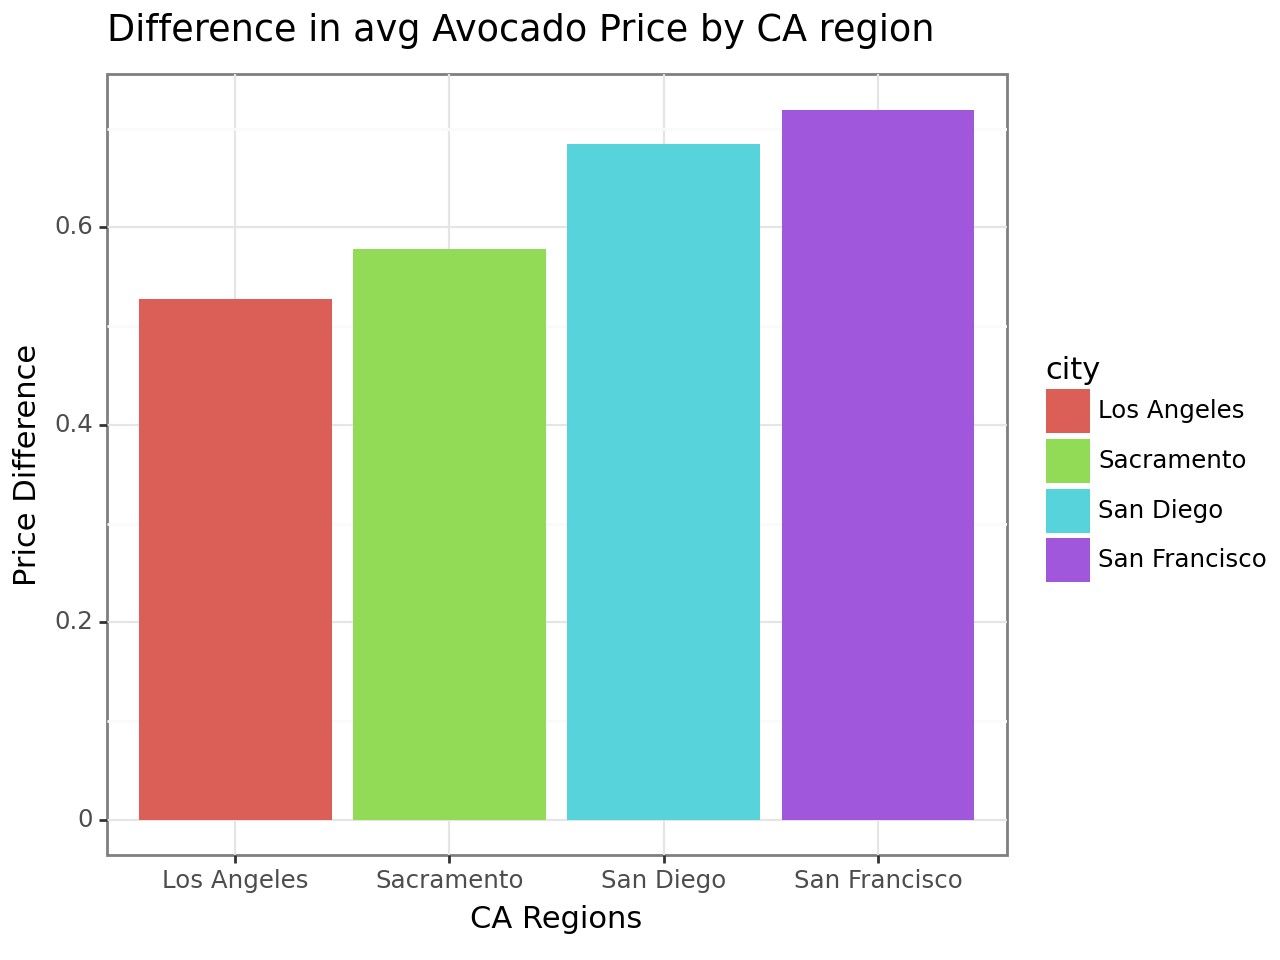

<Figure Size: (640 x 480)>

In [18]:
ggplot(wide_california, aes(x='city', y='price_difference', fill='city'))\
+ geom_bar(stat='identity')\
+ labs(title='Difference in avg Avocado Price by CA region', x='CA Regions', y='Price Difference')\
+ theme_bw()

## 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [19]:
#Creating a total hass sales to be able to get the proporiton later on for each hass
california['total_hass_sales'] = california['small_hass_sales'] + california['large_hass_sales'] + california['xlarge_hass_sales']

#creating columns for the proportions for small, large, xlarge hass sales, respectively
california['small'] = california['small_hass_sales'] / california['total_hass_sales']
california['large'] = california['large_hass_sales'] / california['total_hass_sales']
california['xlarge'] = california['xlarge_hass_sales'] / california['total_hass_sales']
california.head()

C:\Users\dhfer\AppData\Local\Temp\ipykernel_62712\3450396185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dhfer\AppData\Local\Temp\ipykernel_62712\3450396185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dhfer\AppData\Local\Temp\ipykernel_62712\3450396185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,...,day,city,metro,region,state,country,total_hass_sales,small,large,xlarge
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,04,Los Angeles,NaN,NaN,NaN,NaN,2426655.90,0.757421,0.216112,0.026467
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,04,Los Angeles,NaN,NaN,NaN,NaN,49444.91,0.965145,0.034855,0.000000
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,...,04,Sacramento,NaN,NaN,NaN,NaN,390538.80,0.283438,0.691628,0.024934
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,...,04,Sacramento,NaN,NaN,NaN,NaN,8055.04,0.462756,0.537244,0.000000
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,...,04,San Diego,NaN,NaN,NaN,NaN,424754.34,0.574808,0.389165,0.036027


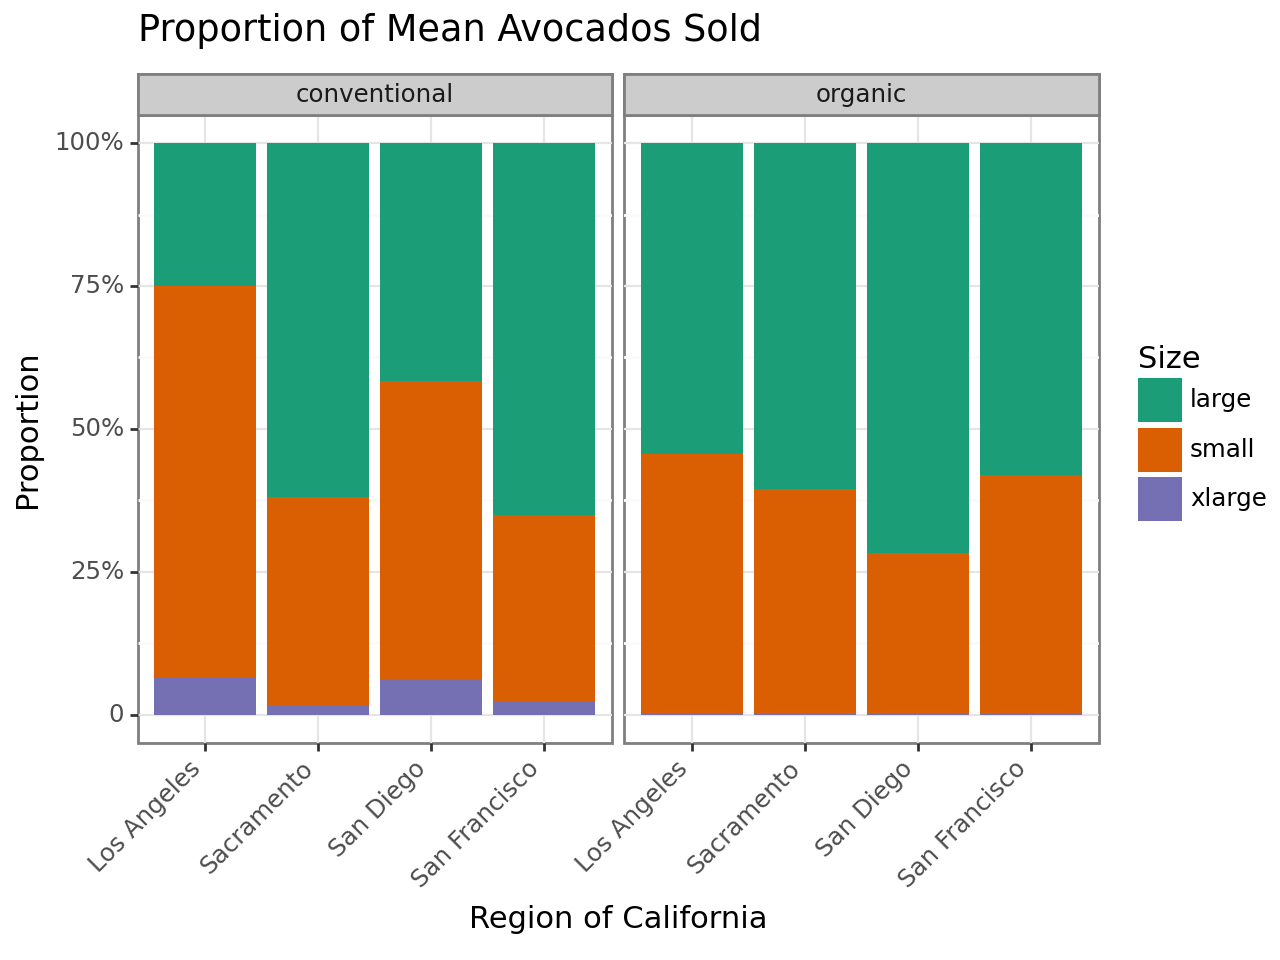

In [20]:
#Only acessing the specific columns that are needed for my plot
plot_data = california[['city','type','small','large','xlarge']]

#melting the columns so that I can visualize appropriately
melted = plot_data.melt(id_vars=['city', 'type'], var_name='Size', value_name='Proportion')

#achieving the proportion to be displayed in terms of 0-1
melted['Proportion'] = melted.groupby(['city', 'type'])['Proportion'].transform(lambda x: x / x.sum())

# Create the stacked bar chart
plot = (ggplot(melted, aes(x='city', y='Proportion', fill='Size'))
+ geom_bar(stat='identity')
+ facet_wrap('~type')
+ labs(title='Proportion of Mean Avocados Sold', x='Region of California', y='Proportion')
+ scale_fill_manual(values=['#1B9E77', '#D95F02', '#7570B3'])
+ theme_bw()
+ scale_y_continuous(breaks=([0, .25, .5, .75, 1]), labels=[0, '25%', '50%', '75%', '100%'])
+ theme(axis_text_x=element_text(rotation=45, hjust=1)))

# Display the stacked bar chart
print(plot)

#Using Outside Data

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

In [21]:
#data exploration
print(california['year'].unique())
print(california['city'].unique())

['2015' '2016' '2017' '2018' '2019' '2020']
['Los Angeles' 'Sacramento' 'San Diego' 'San Francisco']


In [24]:
#Resource: https://www.redfin.com/news/data-center/
#Uploading Housing data
#assinging housing to data set 2
housing = pd.read_csv("housing.csv")


In [25]:
#checking types
california['year'] = california['year'].astype(float)
#type(california['year'][0:])

C:\Users\dhfer\AppData\Local\Temp\ipykernel_62712\1285645767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


- Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

In [26]:
#Joining with left join to keep everything from california df and adding things from housing df
avohousing = california.merge(housing[['city', 'year', 'average_sale_price']], on=['city', 'year'], how='left')
avohousing.head()

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,...,city,metro,region,state,country,total_hass_sales,small,large,xlarge,average_sale_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,Los Angeles,NaN,NaN,NaN,NaN,2426655.90,0.757421,0.216112,0.026467,554090.9091
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,Los Angeles,NaN,NaN,NaN,NaN,49444.91,0.965145,0.034855,0.000000,554090.9091
2,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,...,Sacramento,NaN,NaN,NaN,NaN,390538.80,0.283438,0.691628,0.024934,253818.1818
3,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,...,Sacramento,NaN,NaN,NaN,NaN,8055.04,0.462756,0.537244,0.000000,253818.1818
4,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,...,San Diego,NaN,NaN,NaN,NaN,424754.34,0.574808,0.389165,0.036027,491181.8182


- Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

From the Data It seems thata as time goes by, there seems to be a relationship between avocado sales volume and housing prices. Namely, they both go up with similar rates! While this doesn't mean that correlation is causation it does show that sales of avocadoes in California go up. Housing prices however, are also going up , therefore we could perhaps say that if the amount of Avocado consumption in California decreased, maybe folks could have a little bit more money saved for a down payment on a house. This conclusion is however, not final and more analyses would need to be made to back this claim.

- Support your argument with a plot.

In [27]:
#comparing the scales of the variables in quesiton
print(avohousing['sales_volume'].min())
print(avohousing['sales_volume'].max())

print(avohousing['average_sale_price'].min())
print(avohousing['average_sale_price'].max())

3562.52
5660216.21
253818.1818
1424250.0


In [28]:
#Grouping by year and city to take the average of avocado sales to match the other data set
avohousing['avg_sales'] = avohousing.groupby(['year', 'city'])['sales_volume'].transform('mean')
avohousing.head()

,date,average_price,sales_volume,small_hass_sales,large_hass_sales,xlarge_hass_sales,total_bags,small_bags,large_bags,xlarge_bags,...,metro,region,state,country,total_hass_sales,small,large,xlarge,average_sale_price,avg_sales
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,NaN,NaN,NaN,2426655.90,0.757421,0.216112,0.026467,554090.9091,1.425199e+06
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,NaN,NaN,NaN,NaN,49444.91,0.965145,0.034855,0.000000,554090.9091,1.425199e+06
2,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,...,NaN,NaN,NaN,NaN,390538.80,0.283438,0.691628,0.024934,253818.1818,2.113513e+05
3,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,...,NaN,NaN,NaN,NaN,8055.04,0.462756,0.537244,0.000000,253818.1818,2.113513e+05
4,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,...,NaN,NaN,NaN,NaN,424754.34,0.574808,0.389165,0.036027,491181.8182,2.556320e+05


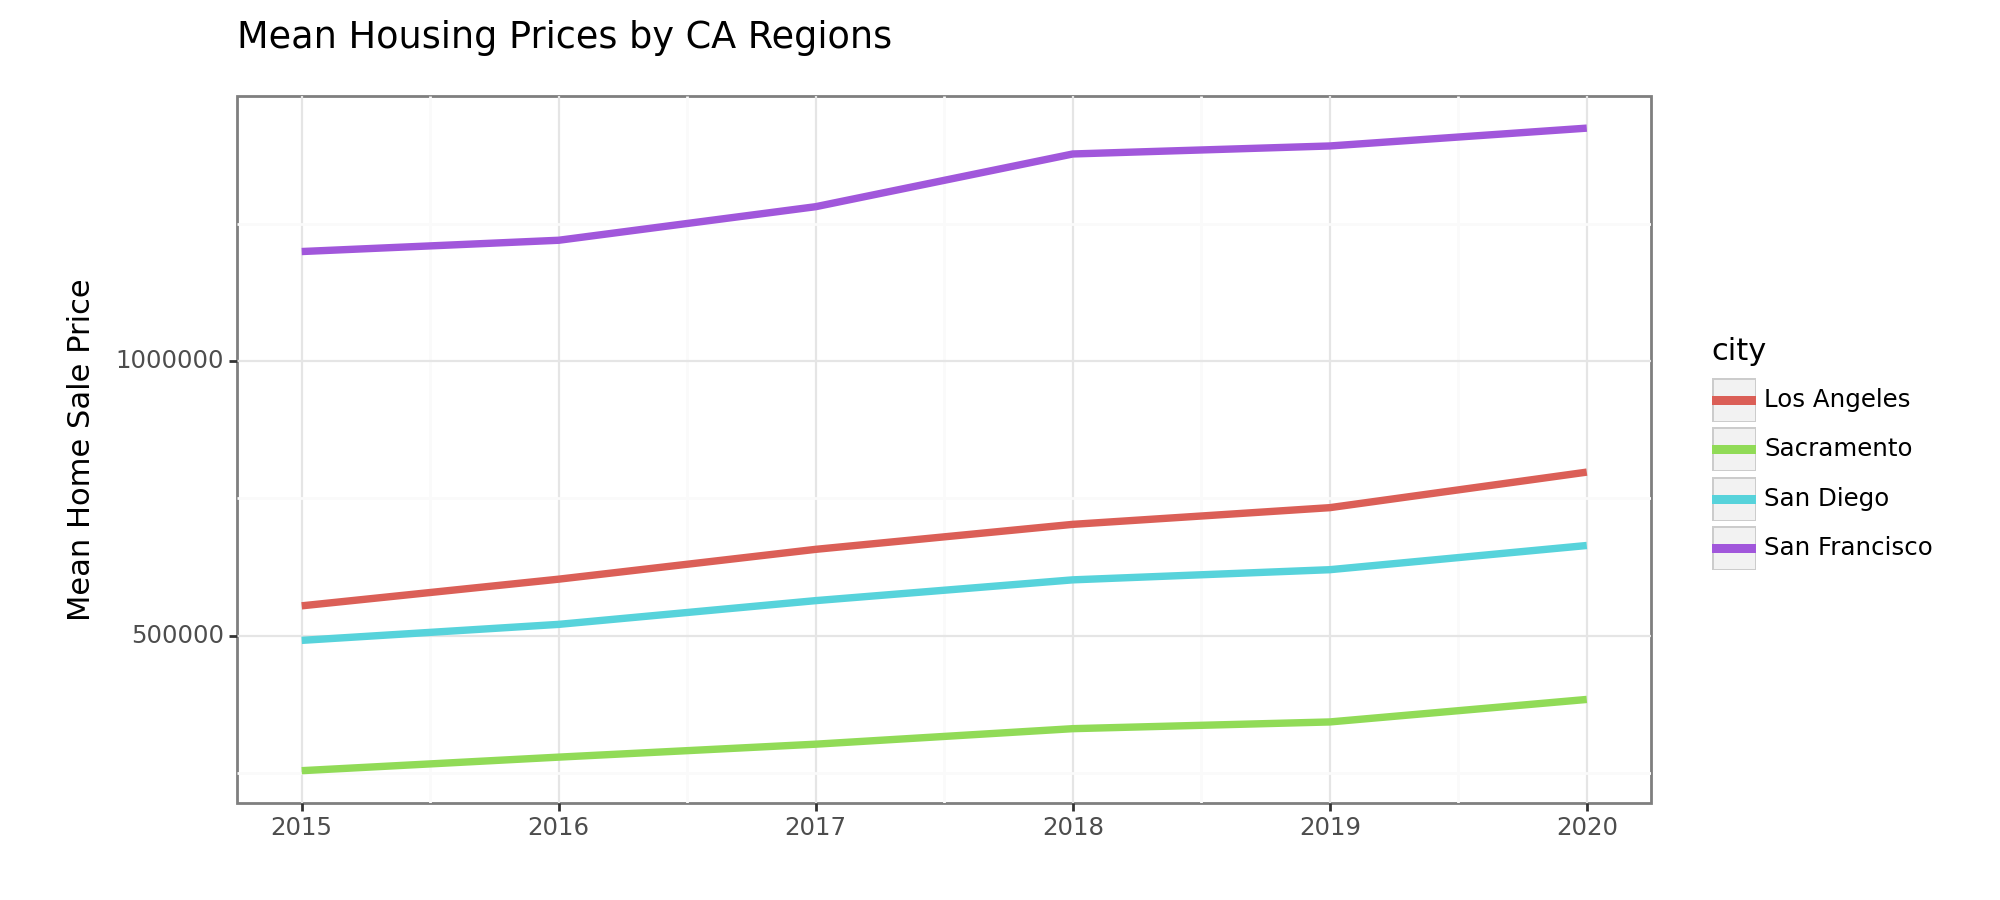

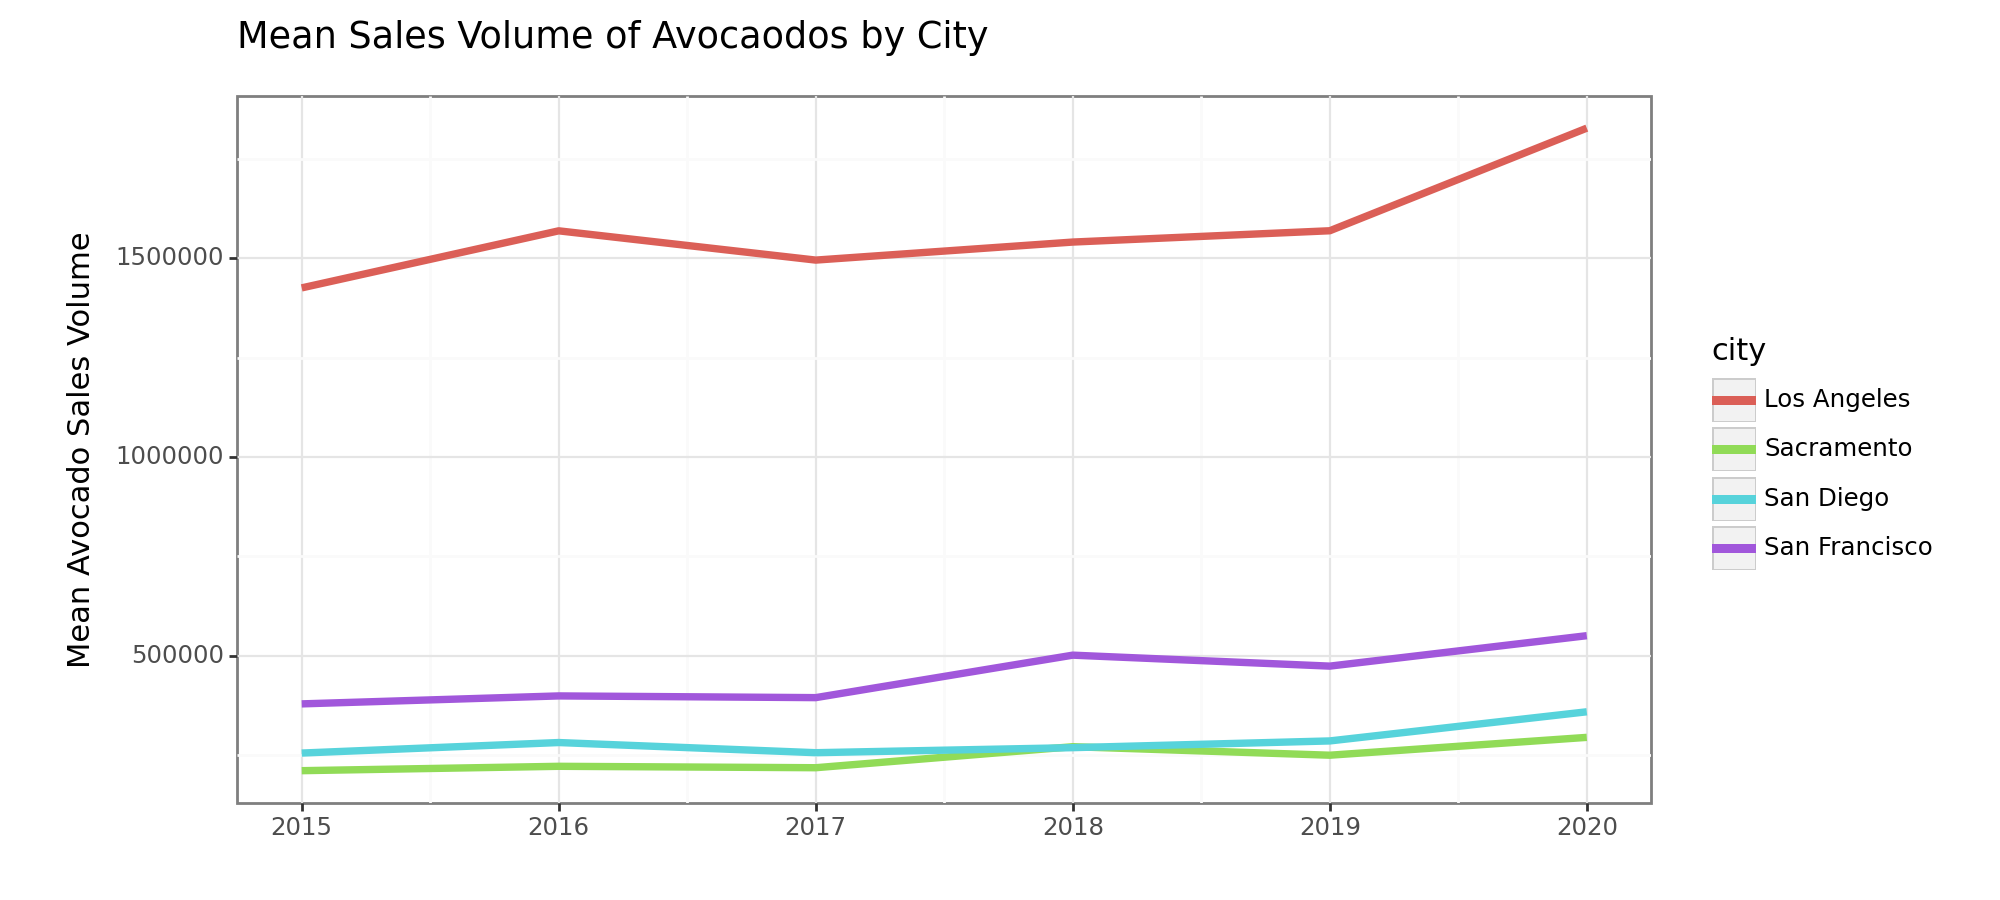

In [29]:
# Visualizing average Housing Prices over time by california region
g1 = (ggplot(data=avohousing, mapping=aes(x='year', y='average_sale_price', color='city'))
+ geom_line(size = 1.5)
+ labs(title='Mean Housing Prices by CA Regions', x='', y='Mean Home Sale Price')
+ theme_bw()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5)))
print(g1)

# Visualizing average Avocado Sales Volume over time by california region
g2 = (ggplot(data=avohousing, mapping=aes(x='year', y='avg_sales', color='city'))
+ geom_line(size = 1.5)
+ labs(title='Mean Sales Volume of Avocaodos by City', x='', y='Mean Avocado Sales Volume')
+ theme_bw()
+ theme(aspect_ratio=.5, figure_size=(10, 4.5)))
print(g2)